<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/guia_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

Ejercicio 1

Implementar un programa que reciba como input una función $f$, dos números $a$ y $b$, y una tolerancia $\text{tol}$ y aplique el método de bisección para aproximar una raíz de $f$ en el intervalo $[a, b]$, garantizando que el error cometido sea menor que $\text{tol}$.

In [ ]:
def biseccion(f,a,b,epsilon):

    es_raiz = False
    if f(a)==0:
        return a
    if f(b)==0:
        return b
    if f(a)*f(b)<0:
        while abs(b-a)>epsilon and not es_raiz:
            c = (a+b)/2
            if f(a)*f(c)<0:
                b=c
            elif f(a)*f(c)>0:
                a=c
            else:
                es_raiz= True
        return (a+b)/2

    else:
        print("No cumple el invariante, cambiar intervalo")


#probamos
def f(x):
    return x**2+2*x-15

y = biseccion(f,-6,-4,1e-8)
print(y)


-5.0


Ejercicio 2

Elegir un intervalo apropiado y utilizar el método de bisección para calcular una raíz de la ecuación $2x = \tan(x)$.

¿Cuántos pasos hay que hacer para garantizar que el error sea menor que $10^{-5}$?

In [ ]:
#elijo el intervalo [-1/2,0]
def g(x):
    return 2*x - math.tan(x)
print(biseccion(g,-0.5,0,1e-5))

0


Ejercicio 3

Implementar un programa que reciba como input una función $f$, su derivada $f'$ y un punto inicial $x_0$ y aplique el método de Newton-Raphson para buscar una raíz de $f$ a partir de $x_0$.

In [ ]:
def cerorectatg(f,fprima,x_0):
    funcion = f(x_0)
    ftg = fprima(x_0)
    x = (ftg*x_0 - funcion)/ftg
    return x

def newtonraphson(f,fprima,x_0,tol):
    candidato = x_0
    while abs(f(candidato)) > tol:
        x = cerorectatg(f,fprima,candidato)
        candidato = x
    return candidato

Ejercicio 4

Implementar un programa que reciba como input una función $f$ y dos puntos $x_0$ y $x_1$ y aplique el método de la secante para buscar una raíz de $f$ con datos iniciales $x_0$ y $x_1$.

In [ ]:
def secante(f: callable,a: float,b : float, max_iter: int = 100, tol: float = 1e-8):
  fa = f(a)
  fb = f(b)
  x = np.empty(max_iter)
  x[0] = a
  x[1] = b - fb*(b-a)/(fb-fa)
  for i in range(max_iter+1):
    if np.abs(x[i+1]-x[i])<tol:
      return x[:i]
    fa = f(x[i])
    fb = f(x[i+1])
    x[i+2] = x[i+1] - fb*(x[i+1]-x[i])/(fb - fa)
  print("No converge") #si sale del for es xq nunca converge, si convergiera te devolvería x
  return x

Ejercicio 5

Aproximar $\sqrt{3}$ utilizando el método de bisección con intervalo inicial $[1, 2]$, el método de Newton-Raphson comenzando con $x_0 = 2$, y el método de la secante con $x_0 = 3$ y $x_1 = 2$. En todos los casos, calcular el error cometido en cada iteración comparando con el valor de $\sqrt{3}$ arrojado por Python, y graficar el logaritmo del error para verificar el orden de convergencia de cada método.

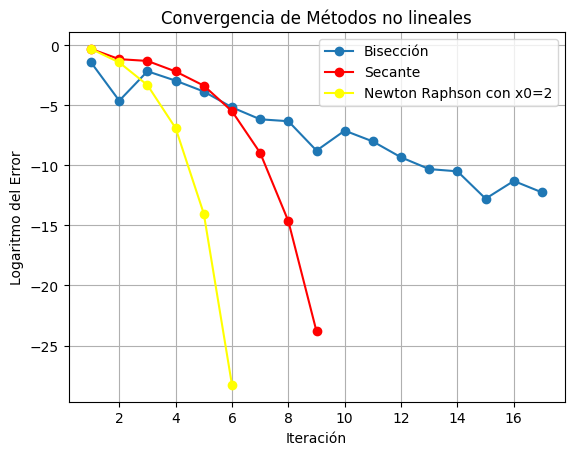

In [ ]:
#ej5, tengo que aproximar 2^1/3, defino la funcion f(x) = x^3 - 2

def h(x):
    return x**3-2
def hprima(x):
  return 3*x**2
# print(biseccion(h,1,2,1e-8))
# print("La raíz cúbica de 2 es",2**(1/3))
#voy a modificar mi codigo de biseccion para que calcule el error
def biseccion_con_error(f,a,b,epsilon,valor_verdadero):
    errores = []
    es_raiz = False
    if f(a)==0:
        return a
    if f(b)==0:
        return b
    if f(a)*f(b)<0:
        while abs(b-a)>epsilon and not es_raiz:
            c = (a+b)/2
            error = abs(c - valor_verdadero)
            errores.append(error)
            if f(a)*f(c)<0:
                b=c
            elif f(a)*f(c)>0:
                a=c
            else:
                es_raiz= True
        return (a+b)/2,errores

    else:
        print("No cumple el invariante, cambiar intervalo")
raizbis,erbis = biseccion_con_error(h, 1, 2, 1e-5, 2**(1/3))
#hago lo mismo con el de la secante, ahora lo tengo que cambiar para que reciba de input un x0 y x1 en vez de un intervalo
def secante_con_error(f: callable,x0,x1, valor_verdadero, max_iter: int = 100, tol: float = 1e-8):
  x = np.empty(max_iter)
  x[0] = x0
  x[1] = x1
  er = [np.log(abs(x[1]-valor_verdadero))]
  for i in range(max_iter+1):
    if np.abs(x[i+1]-x[i])<tol:
      return x[:i],er
    fa = f(x[i])
    fb = f(x[i+1])
    x[i+2] = x[i+1] - fb*(x[i+1]-x[i])/(fb - fa)
    err = abs(x[i+2]-x[i+1])
    er.append(np.log(err))
  print("No converge") #si sale del for es xq nunca converge, si convergiera te devolvería x
  return x,er

def newton_raphson_con_error(f,fprima,x0,valor_verdadero,max_iter = 100, tol = 1e-8):
  x = np.empty(max_iter)
  x[0]=x0
  errores = [np.log(abs(x0-valor_verdadero))]
  iteracion = 0
  while iteracion < max_iter:
    if abs(f(x[iteracion])) > tol:
        x[iteracion +1] = cerorectatg(f,fprima,x[iteracion])
        errores.append(np.log(abs(x[iteracion + 1]-valor_verdadero)))
        iteracion +=1
    else:
      break
  return x[:iteracion + 1],errores  #si en algun momento ya es menor a la tolerancia, que corte y me devuelva la lista hasta ese momento


raizsec,ersec = secante_con_error(h, 3, 2, 2**(1/3))
raizNR, erNR = newton_raphson_con_error(h,hprima,2,(2)**(1/3))
log_errores = [math.log(e) for e in erbis]
iteraciones_biseccion = range(1,len(log_errores)+1)
iteraciones_secante = range(1,len(ersec)+1)
iteraciones_NR = range(1,len(raizNR)+1)
plt.plot(iteraciones_biseccion, log_errores, marker = "o",label='Bisección')
plt.plot(iteraciones_secante,ersec,label = 'Secante', marker = "o", color = "red")
plt.plot(iteraciones_NR,erNR, label = "Newton Raphson con x0=2", color = "yellow",marker = "o")
plt.xlabel('Iteración')
plt.ylabel('Logaritmo del Error')
plt.title('Convergencia de Métodos no lineales')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio 12

Para $f$ una función $C^2$ que tiene una raíz de orden 2 en $r$:

a) Demostrar que el método N-R converge solo linealmente a $r$ (Sugerencia: Notar que en este caso la $g$ del ejercicio anterior no está definida para $x = r$, redefinirla como $g(r) = r$, probar la diferenciabilidad de $g$ y demostrar que $g'(r) \neq 0$).

b) ¿Cuál es el orden de convergencia de la siguiente modificación?
$x_{n+1} = x_n - \frac{2 f(x_n)}{f'(x_n)} $

c) Sea $f(x) = 4x^3 - 3x + 1$. $f$ tiene una raíz doble. Aproximarla calculando las 10 primeras iteraciones de los métodos N-R y del método (1), con dato inicial $x_0 = 25$. Graficar simultáneamente las dos sucesiones obtenidas.

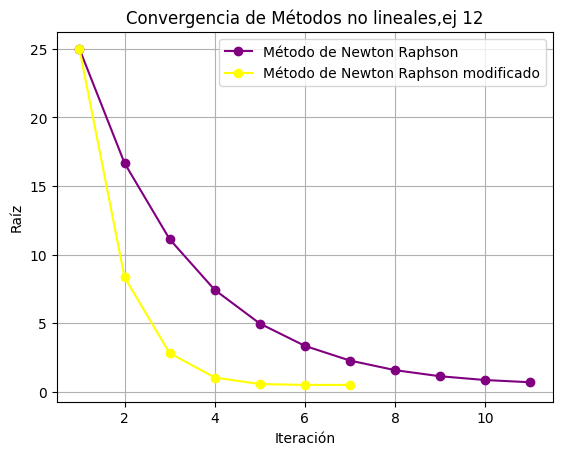

In [ ]:
def ej12(x):
    return 4*x**3 - 3*x + 1
def ej12prima(x):
    return 12*x**2 - 3

def NR(f,fprima,x_0,tol,max_iter =10):
    candidato = x_0
    lista_valores = [x_0]
    iter = 0
    while abs(f(candidato)) > tol and iter < max_iter:
        x = cerorectatg(f,fprima,candidato)
        lista_valores.append(x)
        candidato = x
        iter += 1
    return lista_valores

def NRmodificado(f,fprima,x0,tol,max_iter = 10):
    candidato = x0
    valores_raiz = [x0]
    iter = 0
    while abs(f(candidato))>tol and iter<max_iter:
        funcion = f(candidato)
        ftg = fprima(candidato)
        x = (ftg*candidato - 2*funcion)/ftg
        valores_raiz.append(x)
        candidato = x
        iter +=1
    return valores_raiz

NR = NR(ej12,ej12prima,25,1e-8)
NRM = NRmodificado(ej12,ej12prima,25,1e-8)
iteracionesNR = range(1,len(NR)+1)
iteracionesNRM = range(1,len(NRM)+1)
plt.plot(iteracionesNR,NR,label = 'Método de Newton Raphson', marker = "o", color = "purple")
plt.plot(iteracionesNRM,NRM,label = 'Método de Newton Raphson modificado', marker = "o", color = "yellow")
plt.xlabel('Iteración')
plt.ylabel('Raíz')
plt.title('Convergencia de Métodos no lineales,ej 12')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 13

Dada $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$, el método N-R generalizado consiste en realizar la iteración vectorial
$ x^{k+1} = x^k - (D F|_{x^k})^{-1} \cdot F(x^k), $
donde $(D F|_{x^k})^{-1}$ es la inversa de la matriz diferencial de $F$ evaluada en $x^k$.

Usar N-R generalizado para hallar un mínimo de la función $f(x, y) = ye^{-x^2} + x^2 + y^4 + x$, comenzando con $(x_0, y_0) = (2, 1)$.

In [ ]:
#ej 13, como f:R^2 --->R tengo que buscar un minimo, entonces tengo que igualar  el gradiente F:R^2-->R^2 a (0,0)
def ej13(x,y):
    return y*np.exp(-x**2)+x**2+y**4 +x
def gradiente(x, y):
    df_dx = -2 * x * y * np.exp(-x**2) + 2 * x + 1
    df_dy = np.exp(-x**2) + 4 * y**3
    return np.array([df_dx, df_dy])

# Defino el Jacobiano
def DF(x, y):
    d2f_dx2 = 4 * x**2 * y * np.exp(-x**2) - 2 * y * np.exp(-x**2) + 2
    d2f_dy2 = 12 * y**2
    d2f_dxdy = d2f_dydx = -2 * x * np.exp(-x**2)
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])
def gauss_seidel(A: np.ndarray, b: np.ndarray, x0: [np.ndarray] = None, max_iter: int = 100) -> np.ndarray:
    D = np.diag(np.diag(A))
    L = np.tril(A,-1)
    U = np.triu(A,1)
    DL_inv = np.linalg.inv(D+L)

    M = -DL_inv@U
    c = DL_inv@b

    if x0 is None:
        x0 = c

    # Guardo lugar para la sucesion
    # La fila i va a ser la aproximación en la iteración i
    # Las columnas van a ser las coordenadas de cada aproximación
    x = np.empty((max_iter, x0.size))

    for i in range(max_iter-1):
        x[i+1,:] = M @ x[i,:] + c

    return x[-1,:]

def NR_con_Gausseidel(x0, y0,f, funcion_gradiente, funcion_matriz_diferencial, tol=1e-6, max_iter=100):
    x_0 = np.array([x0, y0], dtype=float)
    raiz = x_0
    for i in range(max_iter):
        if np.linalg.norm(f(*raiz)) < tol: #si f(raiz) se acerca a 0, que pare
            return raiz
        else:
            F = - funcion_gradiente(*raiz)
            J = funcion_matriz_diferencial(*raiz)
            GS = gauss_seidel(J,F)
            raiz = raiz + GS
    return raiz
# Punto inicial
x0, y0 = 2, 1
print("el minimo con GS está en ",NR_con_Gausseidel(2, 1,ej13,gradiente,DF))

el minimo con GS está en  [-0.32296206 -0.60843434]


Ejercicio 14. Considerar el problema de la propagación de una llama:

$ dot{y} = y^2 - y^3 $$\quad \text{para } t \in [0, 2/\delta]$

$y(0) = \delta.$


Al prender un fósforo, la bola de fuego crece rápidamente hasta que alcanza un tamaño crítico. Luego, permanece en ese tamaño porque la cantidad de oxígeno que se consume por la combustión en el interior de la bola se compensa con la cantidad disponible en la superficie. El radio de la bola de fuego se representa con $y(t)$ y los términos $y^2$ y $y^3$ provienen de la superficie y el volumen. El parámetro crítico es el radio inicial $\delta$.

a) Resolver numéricamente el sistema para $\delta = 0.01$ utilizando el método de Euler, con paso $h = 2$. ¿Qué se observa?

b) Repetir el ítem anterior pero utilizando el método de Euler implícito:
$
y_{n} = y_{n+1} - h f(t_{n+1}, y_{n+1}).
$

Para despejar $y_{n+1}$ en cada paso, utilizar el método de Newton-Raphson con dato inicial $y_{n}$. ¿Qué se observa?

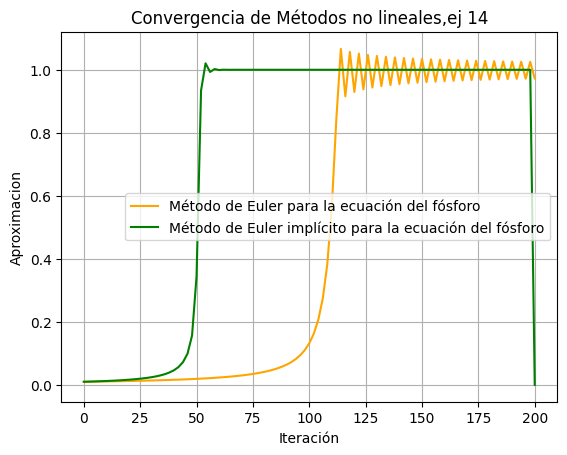

In [ ]:
#ej 14 parte a
def fosforo(t,y):
    return y**2 - y**3
def euler(delta,a,b,N,f):
  h = (b-a)/N
  t = np.linspace(a,b,N+1)
  x = np.zeros(N+1)
  x[0] = delta
  for k in range(1,N+1):
    x[k] = x[k-1] + h*f(t[k-1],x[k-1])
  return t,x

#parte b
def fprima(t,y):
    return 2*y - 3*y**2
def NR(f,fprima,x_0,tol = 1e-8):
    candidato = x_0
    lista_valores = [x_0]
    while abs(f(candidato)) > tol:
        x = cerorectatg(f,fprima,candidato)
        lista_valores.append(x)
        candidato = x
    return lista_valores[-1]
def euler_implicito(delta,a,b,N,f):
  h = (b-a)/N
  t = np.linspace(a,b,N+1)
  x = np.zeros(N+1)
  x[0] = delta
  for k in range(1,N):
      def g(p):
          return p -x[k-1] -h*f(t[k+1],p)
      def g_prima(p):
          return 1 - h*fprima(t[k+1],p)
      p0 = x[k-1]
      p = NR(g,g_prima,p0)
      x[k] = p + h*f(t[k+1],p)
  return t,x

tej14, xej14 = euler(0.01,0,2/0.01,100,fosforo)
tpartb,xpartb = euler_implicito(0.01,0,2/0.01,100,fosforo)
plt.plot(tej14,xej14,label = 'Método de Euler para la ecuación del fósforo', color = "orange")
plt.plot(tpartb,xpartb,label = 'Método de Euler implícito para la ecuación del fósforo', color = "green")
plt.xlabel('Iteración')
plt.ylabel('Aproximacion')
plt.title('Convergencia de Métodos no lineales,ej 14')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 15.

Cuencas de atracción / Fractales de Newton: Sea $P : \mathbb{C} \rightarrow \mathbb{C}$ un polinomio de grado 3, con raíces $r_1, r_2, r_3$ contenidas en el rectángulo $R = [-1, 1] \times [-1, 1]$. Se desea saber, para cada punto $z_0$ en $R$, a qué raíz converge el método de Newton, cuando se toma dato inicial $z_0$. Hacer un programa que:

1. Reciba como input un vector $P = (P_1, P_2, P_3, P_4)$, que representa al polinomio $P(x) = P_1x^3 + P_2x^2 + P_3x + P_4$.
2. Calcule las raíces de $P$ utilizando el comando \texttt{roots}.
3. Haga una grilla de puntos de la forma $(x_j, y_k) \in R$.
4. Para cada punto $(x_j, y_k)$, corra 5 iteraciones del método de Newton, con dato inicial dado por el complejo $z = x_j + iy_k$.
5. Determine la raíz $r$ más próxima al resultado obtenido.
6. Realice un gráfico que pinte cada punto $(x_j, y_k)$ de un color distinto de acuerdo a la raíz a la que el método se aproxime. Por ejemplo: si $r = r_1$, $(x_j, y_k)$ se pinta de azul, si $r = r_2$, de rojo y si $r = r_3$, de amarillo. De este modo, la región pintada de azul es la cuenca de atracción de la raíz $r_1$, etc. Comúnmente, las cuencas de atracción resultan ser fractales. Puede repetirse el experimento para polinomios de mayor grado.

[-1.00000000e+00+0.j -7.77156117e-16+1.j -7.77156117e-16-1.j]
las raices son [-1.00000000e+00+0.j -7.77156117e-16+1.j -7.77156117e-16-1.j]
Para el punto (-1.0, -1.0), la raíz encontrada es (-1.0219940604074689+0.012339036064867796j)
Para el punto (-1.0, -0.7777777777777778), la raíz encontrada es (-0.9984675514659563+0.0003171897563375922j)
Para el punto (-1.0, -0.5555555555555556), la raíz encontrada es (-0.9999999941727313-1.2295285428337382e-08j)
Para el punto (-1.0, -0.33333333333333337), la raíz encontrada es (-1.0000000000000009-3.550098012935239e-16j)
Para el punto (-1.0, -0.11111111111111116), la raíz encontrada es (-1.0000000000000004+4.4377103813616654e-16j)
Para el punto (-1.0, 0.11111111111111116), la raíz encontrada es (-1.0000000000000004-4.4377103813616654e-16j)
Para el punto (-1.0, 0.33333333333333326), la raíz encontrada es (-1.0000000000000009+3.550098012935239e-16j)
Para el punto (-1.0, 0.5555555555555554), la raíz encontrada es (-0.9999999941727313+1.229528542833738

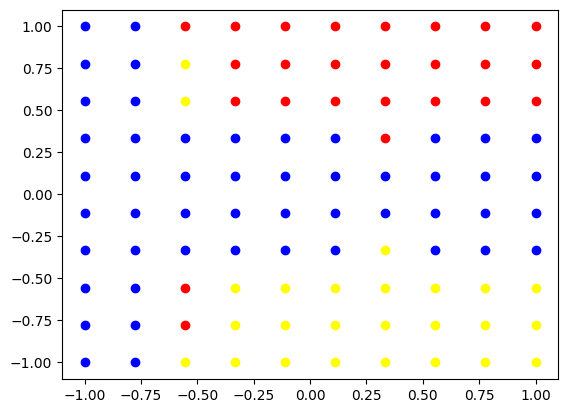

In [ ]:
def pol(p : np.array, x):
    return p[0]*x**3 + p[1]*x**2 + p[2]*x + p[3]
def pol_raices(p: np.array):
    return np.roots(p)
pol_prueba = (pol(np.array([1,1,1,1]), 1))
p = np.array([1,1,1,1])
print(pol_raices(np.array([1,1,1,1])))
r = np.roots(p)
print("las raices son" ,r)
def derivada_pol(p,x):
    return 3*p[0]*x**2 + 2*p[1]*x + p[2]

def NR_complejo(p,z0, iter:int = 5,tolerancia = 1e-8):
    for i in range(5):
        fz = pol(p, z0)
        if abs(fz) < tolerancia:
            return z0
        fz_derivada = derivada_pol(p, z0)
        if fz_derivada == 0:
            print("La derivada se anuló, no es continua en x =",z0)
            sys.exit()
        else:
            z0 = z0 - fz / fz_derivada
    return z0
#Genera la grilla de puntos
n = 10
grilla = np.linspace(-1, 1, n)
puntos = [(x, y) for x in grilla for y in grilla]
for punto in puntos:
    raices = np.roots(p)
    raices_NR = []
    raiz_mas_cerca = []
    x,y = punto
    z0 = complex(x,y)
    raiz = NR_complejo(p,z0)
    distancia_indice = np.argmin(abs(raices-raiz)) #si da 0, está más cerca de la primer raíz, si da 1 de la segunda y si da 2 de la tercera
    raices_NR.append(raiz)
    raiz_mas_cerca.append(distancia_indice)
    for i in range(len(raiz_mas_cerca)):
        if raiz_mas_cerca[i] == 0:
            color = 'blue'
        if raiz_mas_cerca[i] == 1:
            color = 'red'
        if raiz_mas_cerca[i] == 2:
            color = 'yellow'
        plt.scatter(x,y, marker = "o",color = color)

    print(f"Para el punto ({x}, {y}), la raíz encontrada es {raiz}")


Ejercicio 17

Sea $f : \mathbb{R}_{>0} \rightarrow \mathbb{R}$ definida como $f(x) = \frac{8x - 1}{x} - e^x$.

a) Determinar, mediante gráficos convenientes, el número de raíces de $f$, localizando cada una de ellas entre dos enteros consecutivos.

b) Proponer tres métodos de punto fijo para $f$ y determinar si convergen a alguna de sus raíces si se toma dato inicial $x_0 = 1$.

In [ ]:
def punto_fijo (g,x0,max_pasos: int = 100,error: float = 1e-8):
    x=x0
    pasos=0
    while pasos < max_pasos or np.abs(g(x)-x)>error:
        x=g(x)
        pasos=pasos +1
    return x,pasos

def g1(x):
    return math.log(8+1/x)

print(punto_fijo(g1,1)) #converge

(2.136305897550639, 100)


Ejercicio 19.

Dada la función $f(x) = x + \frac{1}{x} - 2$, $f : \mathbb{R}_{>0} \rightarrow \mathbb{R}$, se construye el siguiente algoritmo para aproximar la raíz $r = 1$:
$ x_{n+1} = 2 - \frac{1}{x_n} $
Verificar que si $x_0 > 1$ entonces la sucesión $\{x_n\}$ es monótona decreciente y acotada inferiormente por 1. Concluir que $x_n \rightarrow 1$, aunque esta iteración no está en las hipótesis del teorema del punto fijo. ¿Qué hipótesis no se cumple?

La cantidad de pasos son 99
la raíz es 1.0100000000000002


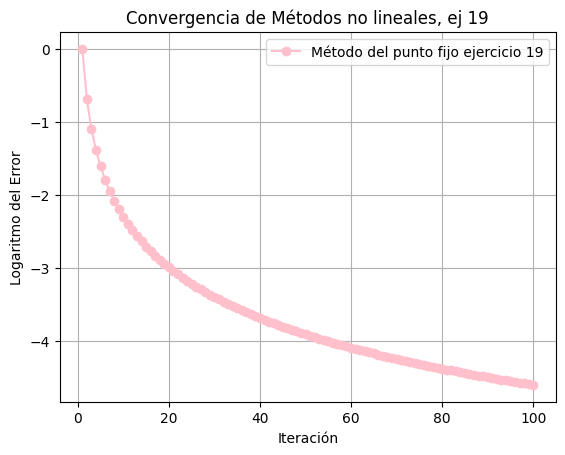

In [ ]:
def punto_fijo_con_error(g,x0,valor_verdadero,max_pasos: int = 100,error: float = 1e-8):
    x = np.empty(max_pasos)
    x[0] = x0
    pasos = 0
    errores = [math.log(abs(x[0]-valor_verdadero))]
    while pasos < max_pasos-1  and abs(g(x[pasos])-x[pasos])>error:
        x[pasos+1] = g(x[pasos])
        errores.append(math.log(abs(x[pasos+1]-valor_verdadero)))
        pasos = pasos + 1
    print("La cantidad de pasos son", pasos)
    print("la raíz es", x[-1])
    return x,pasos,errores

def ej19(x):
    return 2-1/x
y19,x19,z19=(punto_fijo_con_error(ej19, 2, 1))
iteraciones_ej19 = range(1,len(z19)+1)
plt.plot(iteraciones_ej19,z19,label = 'Método del punto fijo ejercicio 19', marker = "o", color = "pink")
plt.xlabel('Iteración')
plt.ylabel('Logaritmo del Error')
plt.title('Convergencia de Métodos no lineales, ej 19')
plt.legend()
plt.grid(True)
plt.show()
